In [ ]:
##3.53.29
#https://github.com/Simranbaiche003/Simranbaiche003.git

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv('Churn_Modelling (1).csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent variable
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:

## Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [ ]:
## concatinate these variable with dataframe
X.drop(['Geography','Gender'],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
## Splitting the dataset into training and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = sc.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = sc.transform(X_test)


In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -0.57369368,
         1.09168714, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  1.74309049,
         1.09168714, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  1.74309049,
        -0.91601335,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -0.57369368,
        -0.91601335,  0.91601335]])

In [ ]:
X_train.shape

(8000, 16)

In [ ]:
## part 2 now lets create ANN

from tensorflow.keras.models import Sequential ##
from tensorflow.keras.layers import Dense  ##
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU ##ACtivation fucntion
from tensorflow.keras.layers import Dropout ##


In [ ]:
  #classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Use a single equal sign for assignment

In [ ]:
## Lets initialize ANN
classifier =Sequential()

In [ ]:
##ADDing the input layer

classifier.add(Dense(units=11,activation='relu'))
## adding the fird hidden layer
classifier.add(Dense(units=7,activation='relu'))

## adding second hiddden layer
classifier.add(Dense(units=6,activation='relu'))



In [ ]:
## adding the output layer

classifier.add(Dense(1,activation='sigmoid'))


In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
##Early stopping: when the accuracy is not incresasing is the stop the process
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [ ]:
## train our neural network
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=[early_stopping])


Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.5190 - accuracy: 0.7554 - val_loss: 0.4483 - val_accuracy: 0.8008
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4307 - accuracy: 0.8054 - val_loss: 0.4238 - val_accuracy: 0.8148
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4123 - accuracy: 0.8184 - val_loss: 0.4122 - val_accuracy: 0.8220
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3973 - accuracy: 0.8296 - val_loss: 0.4068 - val_accuracy: 0.8148
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3831 - accuracy: 0.8380 - val_loss: 0.3880 - val_accuracy: 0.8353
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3705 - accuracy: 0.8449 - val_loss: 0.3805 - val_accuracy: 0.8330
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3593 - accuracy: 0.8492 - val_loss: 0.3717 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

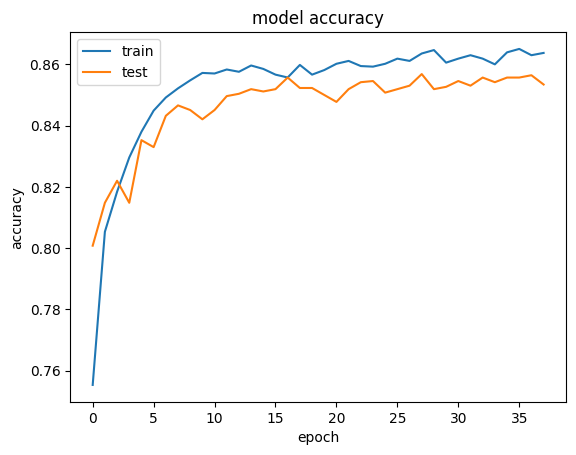

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

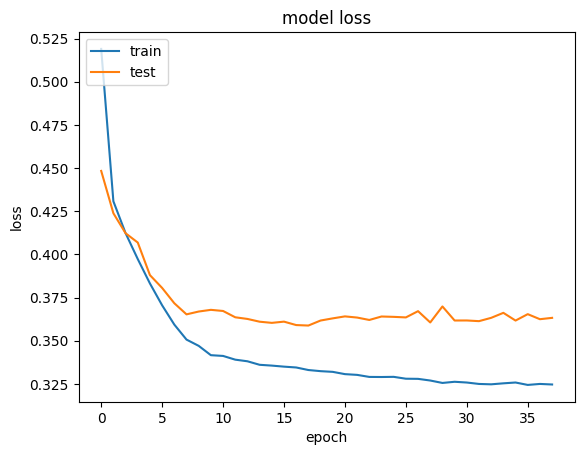

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
##
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import pair_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix # Import the correct function
cm = confusion_matrix(y_test,y_pred)
cm

array([[1513,   82],
       [ 192,  213]])

In [ ]:
## calculating the acccuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.863

In [ ]:
## get the weights
classifier.get_weights()

[array([[ 0.3688345 ,  0.06616496, -0.02399461,  0.36241102,  0.26893395,
         -0.10200578, -0.4617988 ,  0.2842792 , -0.22654308, -0.14904101,
         -0.03994037],
        [-0.30537996, -0.04538412, -0.14839242, -0.01742136, -0.04912302,
         -0.9195733 ,  0.13944286,  0.27476063,  0.63963115, -1.0275196 ,
          0.04569804],
        [ 0.36021864, -0.25315037,  0.03940555, -0.05121662,  0.27341002,
         -0.0632287 , -0.38570058,  0.27457324, -0.00246776, -0.07574327,
         -0.07711493],
        [-0.09350209,  0.2672297 , -0.32767633,  0.18935564, -0.66345996,
          0.06644828,  0.21687421, -0.5107434 ,  0.04760446,  0.00204658,
          0.40863895],
        [ 0.2673504 , -0.9985658 , -1.225503  , -0.3498483 ,  0.7527642 ,
         -0.1222885 , -0.24466588, -0.15924184,  0.06425287, -0.14163505,
          0.94599444],
        [-0.02921878, -0.00156452, -0.10191225,  0.5960255 , -0.02530736,
         -0.11389174, -0.36718416, -0.01414744, -0.03149937, -0.2975687